# International Energy Statistics Project

The goal of this project is to inspect what types of energy different countries use over time and compare that to the annual carbon emmissions for those countries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

energy = pd.read_csv('all_energy_statistics.csv')
print(energy.info())
energy.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB
None


,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


## Investigate the Database

In [2]:
# First, Lets drop quantity footnotes since this gives no relevant information on electricity
energy.drop(columns = 'quantity_footnotes', axis=1)

# See different types of categories and commodities

# Set option to display 100 rows
pd.set_option('display.max_rows', 500)

print("These are the different categories of energy: \n")
print(energy['category'].value_counts())

These are the different categories of energy: 

total_electricity                                              133916
gas_oil_diesel_oil                                              97645
fuel_oil                                                        75132
natural_gas_including_lng                                       64161
liquified_petroleum_gas                                         62156
motor_gasoline                                                  53198
fuelwood                                                        52032
electricity_net_installed_capacity_of_electric_power_plants     50229
other_kerosene                                                  43466
hard_coal                                                       42307
kerosene_type_jet_fuel                                          34558
heat                                                            29656
charcoal                                                        28000
conventional_crude_oil                    

In [3]:
print("There are a total of {0} countries in this study.".format(len(energy['country_or_area'].unique())))

There are a total of 243 countries in this study.


In [4]:
print("There are a total of {0} different commodity transactions in this study.".format\
      (len(energy['commodity_transaction'].unique())))

There are a total of 2452 different commodity transactions in this study.


In [5]:
print("The different types of energy are: \n")
print(energy['unit'].value_counts())

The different types of energy are: 

Metric tons,  thousand     759859
Terajoules                 178937
Kilowatt-hours, million    147741
Cubic metres, thousand      52032
Kilowatts,  thousand        50229
Metric Tons                   684
Name: unit, dtype: int64


In [6]:
print(sum(energy['commodity_transaction'].str.contains('Exports')))
print(sum(energy['commodity_transaction'].str.contains('Imports')))

26328
47001


We can see that there are many different categories and commodity transactions. This will be investigated further later, for now it is good to know that the database is already cleaned (besides quantity footnotes).

## Import CO2 DataFrame & Investigate

In [7]:
# Import database from file
co2_emissions = pd.read_csv('CO2ByAllCountry.csv')
co2_emissions.rename(columns={"country_name":"Country"}, inplace = True)

co2_emissions.head()

,Country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,1.48,1.48,1.53,1.49,1.91,1.71,1.63,1.89,1.64,...,5.64,6.92,9.70,16.34,10.37,9.85,9.48,9.99,10.40,11.00
1,Albania,4.72,4.72,5.37,4.79,5.16,5.24,5.60,5.99,6.82,...,4.60,5.00,4.55,4.79,5.32,4.98,4.82,5.47,5.45,5.66
2,Algeria,18.93,22.31,34.37,46.47,39.29,35.70,46.32,51.28,56.55,...,116.44,122.79,137.15,141.45,152.71,162.42,160.64,159.91,171.33,180.57
3,Angola,8.95,8.54,10.39,11.37,11.83,10.93,7.32,12.06,14.24,...,23.81,24.77,23.72,26.62,28.81,31.48,31.98,27.38,25.49,25.82
4,Anguilla,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.02


In [8]:
print("There are a total of {0} countries in this study.".format(len(co2_emissions['Country'].unique())))

There are a total of 213 countries in this study.


Lets see how many countries are in both Co2 and energy databases.

In [9]:
# First lets take a look at the countries in each
co2_emissions['Country'] = co2_emissions['Country'].str.replace("France and Monaco", "France")
co2_emissions['Country'] = co2_emissions['Country'].str.replace("Italy, San Marino and the Holy See", "Italy")
co2_emissions['Country'] = co2_emissions['Country'].str.replace("Switzerland and Liechtenstein", "Switzerland")
co2_emissions['Country'] = co2_emissions['Country'].str.replace("Serbia and Montenegro", "Serbia")
countries_co2 = co2_emissions['Country'].unique()

print(countries_co2)

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica'
 'Côte d’Ivoire' 'Croatia' 'Cuba' 'Curaçao' 'Cyprus' 'Czechia'
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Falkland Islands' 'Faroes'
 'Fiji' 'Finland' 'France' 'French Guiana' 'French Polynesia' 'Gabon'
 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Greenland' 'Grenada'
 'Guadeloupe' 'Guatemala' 'Guinea' 'Guin

It looks like Korea will not match properly without some editing & Russian Federation

In [10]:
# Fix North Korea
energy['country_or_area'] = energy['country_or_area'].str.replace("Korea, Dem.Ppl's.Rep.", "North Korea")

# Fix South Korea
energy['country_or_area'] = energy['country_or_area'].str.replace("Korea, Republic of", "South Korea")

# Fix Russia
energy['country_or_area'] = energy['country_or_area'].str.replace("Russian Federation", "Russia")

In [11]:
countries_energy = energy['country_or_area'].unique()
print(countries_energy)

['Austria' 'Belgium' 'Czechia' 'Finland' 'France' 'Greece' 'Hungary'
 'Italy' 'South Korea' 'Netherlands' 'Romania' 'Serbia' 'Slovakia'
 'Ukraine' 'United Kingdom' 'United States' 'Brunei Darussalam' 'Bulgaria'
 'Canada' 'Chile' 'Croatia' 'Iran (Islamic Rep. of)' 'Jordan' 'Lithuania'
 'Mexico' 'Oman' 'Other Asia' 'Poland' 'Portugal' 'Spain' 'Sweden'
 'Switzerland' 'T.F.Yug.Rep. Macedonia' 'Turkey' 'Uzbekistan' 'Argentina'
 'Colombia' 'Germany' 'Norway' 'Australia' 'China, Macao SAR' 'Japan'
 'Denmark' 'Ireland' 'Philippines' 'Bangladesh' 'Eritrea' 'Ethiopia'
 'Lesotho' 'Nepal' 'Niger' 'Pakistan' 'Serbia and Montenegro' 'Tunisia'
 'Botswana' 'Georgia' 'Republic of Moldova' 'Peru' 'South Africa'
 'Iceland' 'Latvia' 'Luxembourg' 'Cuba' 'Kyrgyzstan' 'Singapore'
 'Thailand' 'United Arab Emirates' 'Uruguay' 'Armenia' 'Fiji'
 'North Korea' 'Russia' 'Swaziland' 'Zimbabwe' 'Afghanistan'
 'Antigua and Barbuda' 'Azerbaijan' 'Bahamas' 'Belize'
 'Bolivia (Plur. State of)' 'Brazil' 'Burkina Faso' 'C

In [12]:
# Find which countries are in both dataframes

# Initialize empty list
countries_both = []

for country in countries_energy:
    if country in countries_co2:
        countries_both.append(country)
        
print("There are {0} countries in both databases.".format(len(countries_both)))

There are 177 countries in both databases.


In [13]:
# Create new dataframes for country_cleaned databases

# Energy dataframe
energy_c = energy[energy['country_or_area'].isin(countries_both)].copy()
energy_c.rename(columns={'country_or_area':'Country'}, inplace=True)

# Co2 emissions dataframe
co2_c = co2_emissions[co2_emissions['Country'].isin(countries_both)].copy()


In [14]:
print("Minimum year for energy by country is: {0}".format(np.min(energy_c['year'])))

Minimum year for energy by country is: 1990


Before removing the years before 1990, lets plot to see what the graph looks like for the top 30 co2 emitting countries.

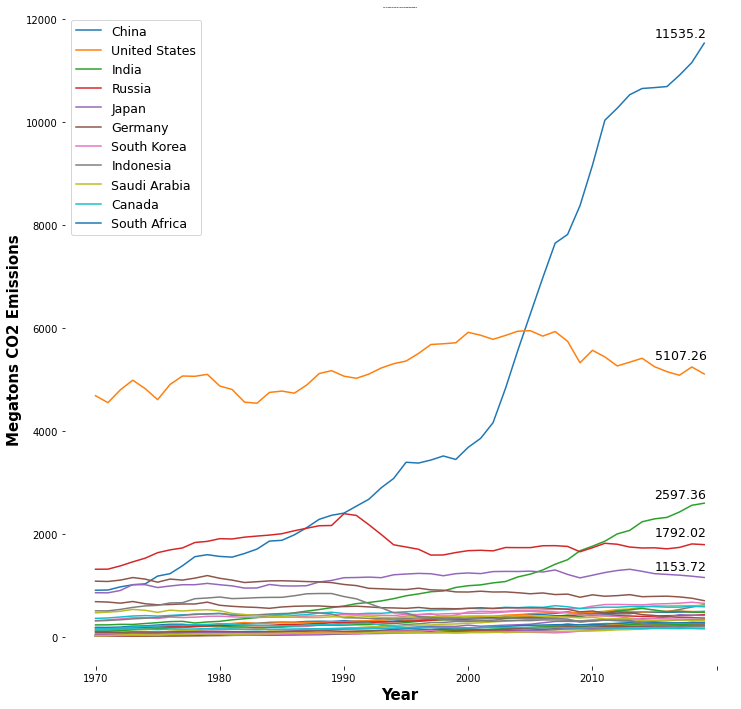

In [15]:
# Find top 30 most co2 emitting countries
top_30 = co2_c.sort_values(by='2019',axis=0, ascending=False).head(30)

# Plot a kdeplot
countries = top_30['Country'].unique()
columns = top_30.columns[1:]

top_30.set_index('Country', inplace=True)

fig = plt.figure(figsize = [12,12])
ax1 = fig.add_subplot(1,1,1)
for i in top_30.index:
    top_30.loc[i].plot()

plt.legend(countries[[0,1,2,3,4,5,6,7,8,9,10]], loc='upper left', fontsize=12.5)
ax1.spines["top"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.annotate(top_30['2019'][0], xy=(45,11650), fontsize=12.5)
ax1.annotate(top_30['2019'][1], xy=(45,5400), fontsize=12.5)
ax1.annotate(top_30['2019'][2], xy=(45,2700), fontsize=12.5)
ax1.annotate(top_30['2019'][3], xy=(45,1950), fontsize=12.5)
ax1.annotate(top_30['2019'][4], xy=(45,1300), fontsize=12.5)
ax1.set_title("CO2 Emissions per year for Top 30 CO2 Emitting Countries", fontweight="bold", fontsize=1)
ax1.set_xlabel("Year", fontweight="bold", fontsize=15)
ax1.set_ylabel('Megatons CO2 Emissions', fontweight="bold", fontsize=15)
plt.show()    

In [16]:
# Find all countries in Europe and lump their emissions together

europe = ['Germany', 'France', 'Italy', 'United Kingdom', 'Netherlands', 'Sweden', 'Switzerland', 'Poland',
         'Greeze', 'Belguim', 'Austria', 'Czechia', 'Ireland', 'Denmark', 'Norway', 'Ukraine', 'Finland', 'Romania',
         'Croatia', 'Iceland', 'Hungary', 'Luxembourg', 'Malta', 'Bulgaria', 'Belarus', 'Albania', 'Serbia', 'Slovenia',
         'Lithuania', 'Slovakia']
europe_both = []
for i in europe:
    if i in countries_energy:
        europe_both.append(i)


europe_emissions = []
for i in europe_both:
    emissions = co2_c[co2_c['Country']==i]['2019'].values
    europe_emissions.append(emissions.item(0))
europe_total_emissions = round(np.sum(europe_emissions),2)

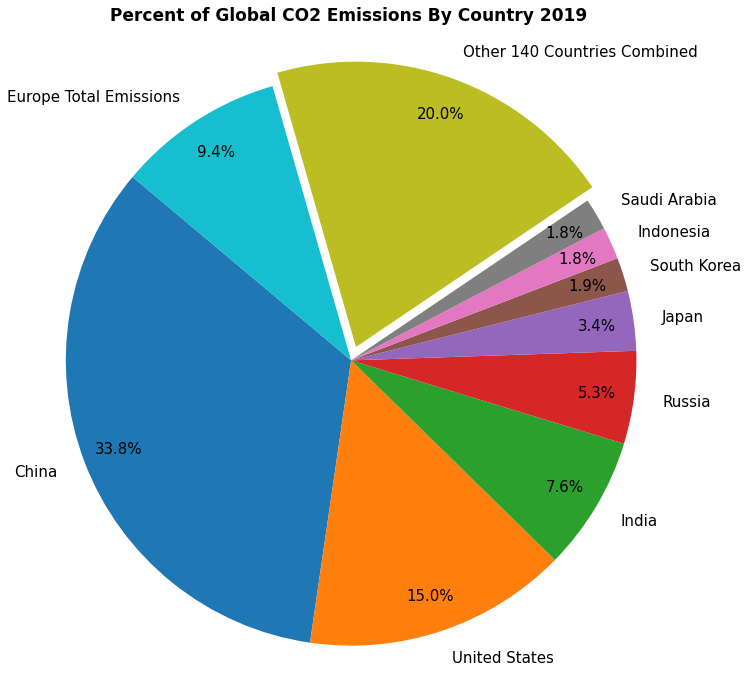

In [17]:
# Create Pie Chart for CO2 emissions by top 10 and rest
co2_c_no_europe = co2_c[~co2_c['Country'].isin(europe)].copy()

top_8 = co2_c_no_europe.sort_values(by='2019',axis=0, ascending=False).head(8)
top_8.set_index('Country', inplace=True)

rest = co2_c_no_europe.sort_values(by='2019', axis=0, ascending=False).tail(140)
sum_rest = round(np.sum(rest['2019']),2)

sizes = top_8['2019'].values.tolist()
sizes.append(sum_rest)
sizes.append(europe_total_emissions)
labels = top_8.index.tolist()
labels.append('Other 140 Countries Combined')
labels.append("Europe Total Emissions")
explode = (0,0,0,0,0,0,0,0,.05,0)

fig1, ax1 = plt.subplots(figsize=[12,12])
patches, texts, autotexts = ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       startangle=140, textprops = {"fontsize":15}, pctdistance=.87)

ax1.axis('equal')
ax1.set_title("Percent of Global CO2 Emissions By Country 2019", fontweight="bold", fontsize=17)

plt.show()

### Since the Top 12 countries contribute more than 75% of total global CO2 emissions lets investigate them further.

We are going to split up the top 12 countries into individual dataframes to better interpret their energy production and their individual CO2 levels over time. This will better enable us to get a grasp of what kinds of energy are being used on a per country basis.

In [18]:
top_12 = co2_c.sort_values(by='2019',axis=0, ascending=False).head(12)
top_12_countries = top_12['Country'].tolist()
top_12_countries

['China',
 'United States',
 'India',
 'Russia',
 'Japan',
 'Germany',
 'South Korea',
 'Indonesia',
 'Saudi Arabia',
 'Canada',
 'South Africa',
 'Mexico']

Lets investigate the different type of commodity transactions are under the 'total electricity' category.

In [19]:
china_energy = energy_c[(energy_c['Country'] == 'China') & (energy_c['category'] == 'total_electricity')].copy()
all_china = china_energy['unit'].value_counts()[0]

# initialize relevant energy based on the value counts of china. This was confirmed with
# the values for united states, but this code has since been deleted (and can easily be duplicated)
relevant_energy = ['Electricity - net production', 'Electricity - imports', 'Electricity - exports', 'Hydro – Main activity', 'Wind – Main activity', 
                   'Nuclear – Main activity', 'From combustible fuels – Main activity – Electricity plants', 
                   'Solar – Main activity']

china_energy['commodity_transaction'].value_counts()

Electricity - imports                                                             25
Electricity - Consumption in agriculture, forestry and fishing                    25
Hydro – Main activity                                                             25
Electricity - Own use by electricity, heat and CHP plants                         25
Electricity - Gross production                                                    25
Electricity - Gross demand                                                        25
Electricity - Consumption by households                                           25
Electricity - Consumption not elsewhere specified (other)                         25
Electricity - Final energy consumption                                            25
From combustible fuels – Main activity                                            25
Electricity - exports                                                             25
Electricity - net production                                     

There are many different classifications of commodity transactions of electricity. We will focus on power producing activity (as well as imports and exports).

In [20]:
def country_electricity(energy_c, country):
    """ Take in total electricity databae and country to clean the data for just a desired country
    
    Args:
        energy_c (dataframe): Dataframe of cleaned overall energy dataset
        country (string): Name of desired country to be cleaned
    
    Returns:
        df (dataframe): Dataframe of country with the index of years and the columns different electricity 
                        production statistics
    
    Raises:
        ValueError: the country provided must be a string and also in the dataframe
        
    Notes: This function cleans the dataframe for one country only and does so under strict provisions. 
           It is able to be expanded upon or negated according to what column names are needed.
           Think about adding additional argument for column names.
    
    """
    # Raise error if country is not a string or in database
    if (not isinstance(country, str)) or (country not in energy_c['Country']):
        raise ValueError('`country` must be a string and in the dataframe provided')
    # Define which country we are using
    country_energy = energy_c[(energy_c['Country'] == country) & (energy_c['category'] == 'total_electricity')].copy()

    col_names = ['Year', 'Electricity - imports', 'Electricity - exports', 'Hydro – Main activity', 'Wind – Main activity', 
                       'Nuclear – Main activity', 'Solar – Main activity', 
                       'From combustible fuels – Main activity – Electricity plants', 'Electricity - net production']
    
    # Initiate master dataframe
    df = pd.DataFrame(columns = col_names)
    
    for year in country_energy['year'].unique():

        # Make list for all relevant energy in the year
        year_energy = {'Year': year}
        
        # Iterate over all energy commodities
        for commodity in relevant_energy:
            
            # Extract commodity values
            energy_per_sector = country_energy[(country_energy['year']==year) & 
                                           (country_energy['commodity_transaction'] == commodity)]['quantity']
            
            # Ensure that if the dataframe is empty the values are 0 instead of
            # the code throwing an error for empty dataframe
            if energy_per_sector.empty == True:
                energy_values = 0
            else:
                energy_values = energy_per_sector.values.item(0)
            
            # Append to list
            year_energy[commodity] = energy_values

        # Use that list and relevant columns to make a dataframe for that year
        df2 = pd.DataFrame(year_energy, index=[0])
        
        # Append that dataframe to master dataframe
        df = df.append(df2, ignore_index=True)
        

    
    # Rename columns to appropriate names
    col_renames = {'Year': 'Year', 
                   'Electricity - imports': 'E_imports', 
                   'Electricity - exports': 'E_exports', 
                   'Hydro – Main activity': 'Hydro', 
                   'Wind – Main activity': 'Wind', 
                   'Nuclear – Main activity': 'Nuclear', 
                   'Solar – Main activity': 'Solar', 
                   'From combustible fuels – Main activity – Electricity plants': 'Combustible_fuels', 
                   'Electricity - net production': 'Electricity_net'}
    df.rename(columns= col_renames, inplace=True)
    
    # Make year the index of the dataframe
    df.set_index('Year', inplace=True)
    
    # Calculate difference between imports and exports and make a column to contain those values
    df.insert(2, 'Net_import', 0)
    df['Net_import'] = df['E_imports'] - df['E_exports']
    
    # Delete E_imports and E_exports
    df.drop(columns=['E_imports', 'E_exports'], inplace=True)

    # Calculate the rest of the energy produced by fossil fuels
    df.insert(6, 'Other_fossil_fuels', 0)
    df['Other_fossil_fuels'] = df['Electricity_net'] - (df['Combustible_fuels'] + 
                                                        df['Solar'] +
                                                        df['Wind'] + 
                                                        df['Nuclear'] + 
                                                        df['Hydro'] -
                                                        df['Net_import'])
    # Make column with just fossil fuels
    df.insert(7, 'Fossil_fuels', 0)
    df['Fossil_fuels'] = df['Combustible_fuels'] + df['Other_fossil_fuels']
    df.drop(columns = ['Combustible_fuels', 'Other_fossil_fuels'], inplace=True)
    
    # Sort by index
    df.sort_index(axis=0, ascending=False, inplace=True)
    return df
    
unit = 'Kilowatt-hours, million'

# Prove that the function works with us energy
us_energy = country_electricity(energy_c, 'United States')
us_energy

,Net_import,Hydro,Wind,Nuclear,Solar,Fossil_fuels,Electricity_net
Year,,,,,,,
2014,53213.0,280195.0,183732.0,830584.0,17828.0,2863265.0,4122391.0
2013,59002.0,286579.0,169611.0,822004.0,8917.0,2865292.0,4093401.0
2012,47262.0,295887.0,141848.0,801129.0,4317.0,2881232.0,4077151.0
2011,37263.0,342838.0,120798.0,821405.0,1828.0,2884108.0,4133714.0
2010,25976.0,284550.0,95132.0,838931.0,1300.0,2963320.0,4157257.0
2009,34053.0,296433.0,74226.0,830210.0,973.0,2810970.0,3978759.0
2008,32821.0,280230.0,55696.0,837804.0,955.0,3010228.0,4152092.0
2007,31253.0,273827.0,34603.0,836634.0,689.0,3076041.0,4190541.0
2006,18420.0,314655.0,26676.0,816195.0,565.0,2958124.0,4097795.0


If net import is negative, the country had more energy exported than imported.

Now that we have a working function for taking the dataframe and the name of a country and outputting that country and its energy sources, lets use that function for the rest of the countries in top_12_countries and make plots of all 12.

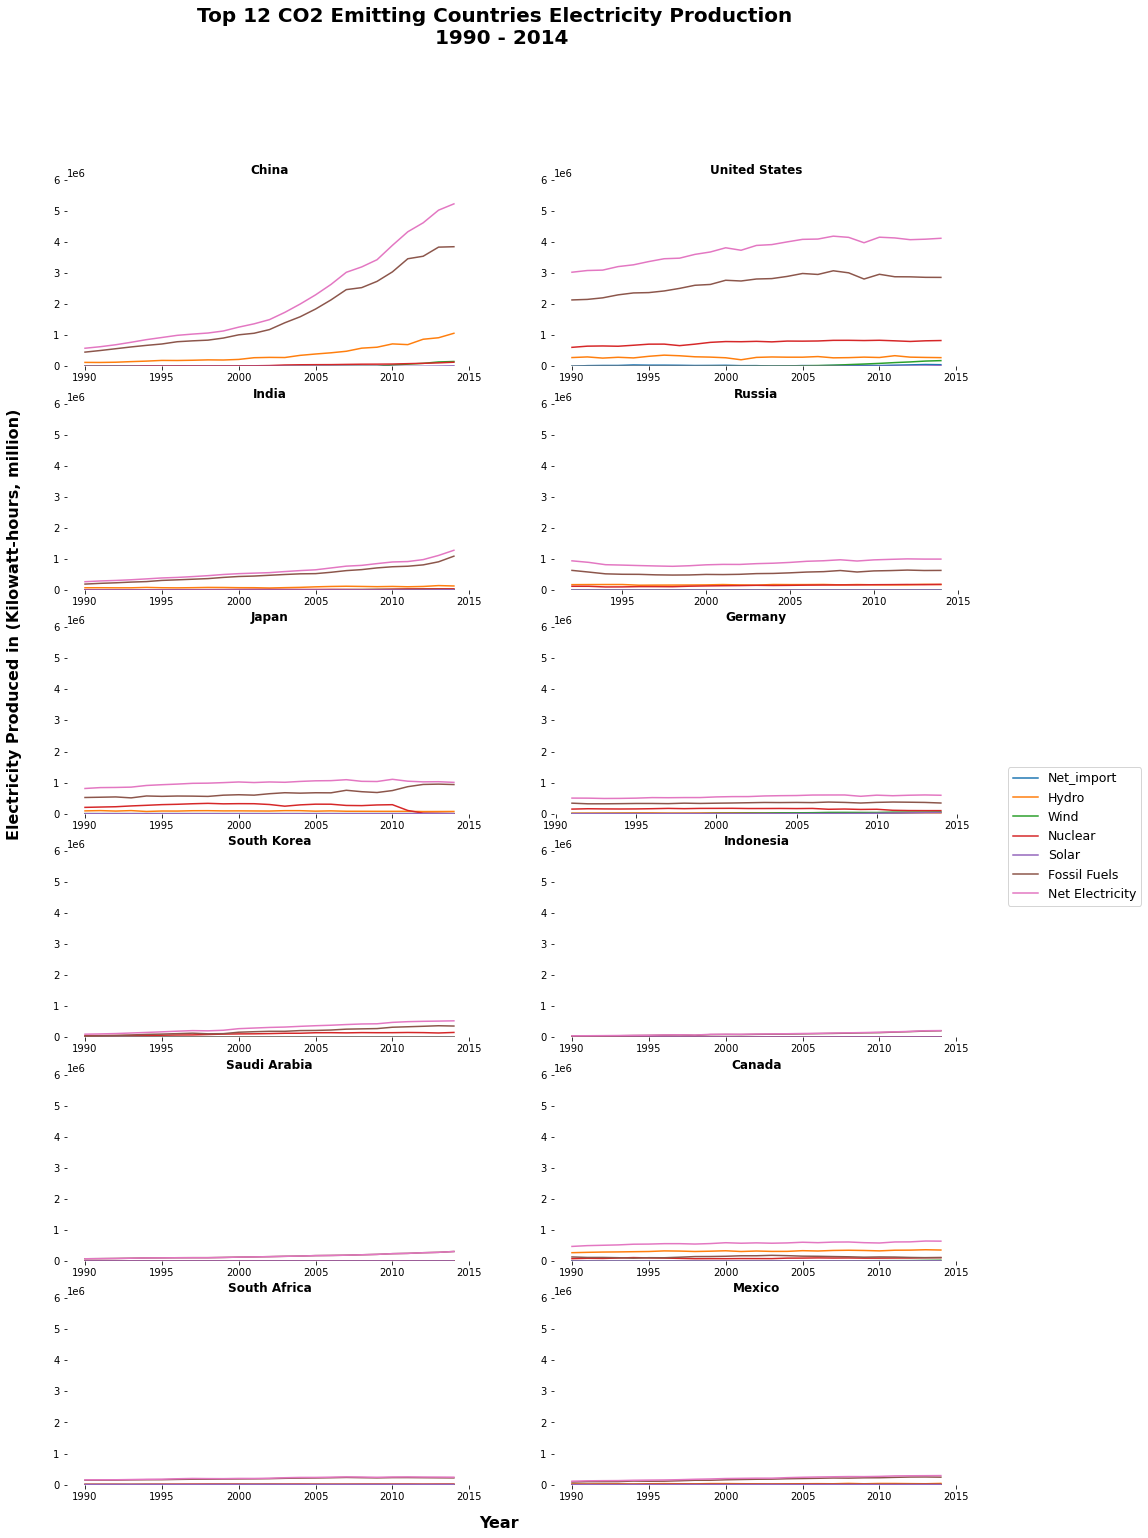

In [21]:
# Initialize Figure
fig, ax_array = plt.subplots(6,2,squeeze=False, figsize=(16,24))

# Iterate through all 12 spots on chart
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title('{0}'.format(top_12_countries[i*2+j]), fontweight="bold")

        # Clean up chart junk
        no_labels = [1,3,5,7,9]
        left_side_labels = [0,2,4,6,8]
        bottom_labels = [11]
        
        # Destroy pesky lines taking up my beautiful ink space
        axes.spines["top"].set_visible(False)
        axes.spines["bottom"].set_visible(False)
        axes.spines["left"].set_visible(False)
        axes.spines["right"].set_visible(False)
        
        # This was commented out to make all of the axis the same scale, uncomment here and comment out
        # the 'same scale' section to see in abbreviated scale
        
        # Throw out non-needed labels
#         if (i*2+j) in no_labels:
#             axes.set_yticklabels([])
#             axes.set_xticklabels([])
#             axes.set_xticks([])
#             axes.set_yticks([])
#         elif (i*2+j) in left_side_labels:
#             axes.set_xticklabels([])
#             axes.set_xticks([])
#         elif (i*2+j) in bottom_labels:
#             axes.set_yticklabels([])
#             axes.set_yticks([])
            
        # Format x_ticks and y_ticks for each graph
#         if (i*2+j) in range(2):
#             axes.set_ylim(0,6000000)
#         elif (i*2+j) in range(2,4):
#             axes.set_ylim(0,1200000)
#         elif (i*2+j) in range(4,6):
#             axes.set_ylim(0,1200000)
#         elif (i*2+j) in range(6,8):
#             axes.set_ylim(0,600000)
#         elif (i*2+j) in range(8,10):
#             axes.set_ylim(0,700000)
#         elif (i*2+j) in range(10,12):
#             axes.set_ylim(0,300000)

        # Same scale
        axes.set_ylim(0,6000000)
        
        axes.plot(country_electricity(energy_c, top_12_countries[i*2+j]))
        
# Set Figure legends and labels
fig.legend(['Net_import', 
             'Hydro',
             'Wind',
             'Nuclear',
             'Solar',
             'Fossil Fuels',
             'Net Electricity'
            ], loc='center', fontsize=12.5, bbox_to_anchor=(1,.5))
fig.text(.08, .5, 'Electricity Produced in ({0})'.format(unit), ha='center', fontweight="bold", rotation='vertical', fontsize=16)
fig.text(.5, .1, 'Year', ha='center', fontweight="bold", fontsize=16)
fig.suptitle('Top 12 CO2 Emitting Countries Electricity Production \n 1990 - 2014', fontweight="bold", fontsize=20)

# Show figure
plt.show()

Notice how Japans decrease in nuclear energy led to a corresponding increase in fossil fuels.

## Start to analyze how energy production correlated to CO2 levels 

-for the years 1990 to 2014

To do this, we will use the existing function for separating based on country, add an additional step of creating one column of clean energy (Nuclear, Wind, Hydro, and Solar) and one column of fossil fuel energy. Then the year, name of country, and total CO2 emissions for that country will be added in the same row. This will be done for all countries in both databases.

In [22]:
# Take all of the clean energy and put it into one column
us_energy['clean_energy'] = us_energy['Solar'] + us_energy['Wind'] + us_energy['Nuclear'] + us_energy['Hydro']
us_energy.rename(columns = {'Fossil_fuels':'ff_energy'}, inplace=True)
us_energy['co2_emissions'] = 0
for i in us_energy.index:
    year = str(i)
    us_energy.loc[i,'co2_emissions'] = (co2_c[(co2_c['Country']=="United States")][year].values[0])
    
us_energy

,Net_import,Hydro,Wind,Nuclear,Solar,ff_energy,Electricity_net,clean_energy,co2_emissions
Year,,,,,,,,,
2014,53213.0,280195.0,183732.0,830584.0,17828.0,2863265.0,4122391.0,1312339.0,5412.96
2013,59002.0,286579.0,169611.0,822004.0,8917.0,2865292.0,4093401.0,1287111.0,5337.03
2012,47262.0,295887.0,141848.0,801129.0,4317.0,2881232.0,4077151.0,1243181.0,5263.64
2011,37263.0,342838.0,120798.0,821405.0,1828.0,2884108.0,4133714.0,1286869.0,5438.92
2010,25976.0,284550.0,95132.0,838931.0,1300.0,2963320.0,4157257.0,1219913.0,5567.64
2009,34053.0,296433.0,74226.0,830210.0,973.0,2810970.0,3978759.0,1201842.0,5325.08
2008,32821.0,280230.0,55696.0,837804.0,955.0,3010228.0,4152092.0,1174685.0,5742.93
2007,31253.0,273827.0,34603.0,836634.0,689.0,3076041.0,4190541.0,1145753.0,5931.99
2006,18420.0,314655.0,26676.0,816195.0,565.0,2958124.0,4097795.0,1158091.0,5843.16


In [23]:
# Automate it for all countries in both dataframes

energy_and_co2 = pd.DataFrame()
for country in countries_both:
    df = country_electricity(energy_c, country)
    df['clean_energy'] = df['Solar'] + df['Wind'] + df['Nuclear'] + df['Hydro']
    df.rename(columns = {'Fossil_fuels':'ff_energy'}, inplace=True)
    df['co2_emissions'] = 0
    for i in df.index:
        year = str(i)
        df.loc[i,'co2_emissions'] = (co2_c[(co2_c['Country']==country)][year].values[0])
        
    # Set index so that there are proper indices on the master dataframe
    df.set_index([pd.Index(range(df.shape[0]))])
    energy_and_co2 = energy_and_co2.append(df, ignore_index=True)

In [24]:
# Convert all columns to floats
energy_and_co2 = energy_and_co2.astype('float64')

In [25]:
energy_and_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Net_import       4325 non-null   float64
 1   Hydro            4325 non-null   float64
 2   Wind             4325 non-null   float64
 3   Nuclear          4325 non-null   float64
 4   Solar            4325 non-null   float64
 5   ff_energy        4325 non-null   float64
 6   Electricity_net  4325 non-null   float64
 7   clean_energy     4325 non-null   float64
 8   co2_emissions    4325 non-null   float64
dtypes: float64(9)
memory usage: 304.2 KB


In [26]:
energy_and_co2

,Net_import,Hydro,Wind,Nuclear,Solar,ff_energy,Electricity_net,clean_energy,co2_emissions
0,9275.0,44251.0,3846.0,0.0,785.0,22731.0,62338.0,48882.0,67.50
1,7271.0,45225.0,3152.0,0.0,582.0,23172.0,64860.0,48959.0,71.00
2,2809.0,47167.0,2462.0,0.0,337.0,22380.0,69537.0,49966.0,70.77
3,8195.0,36816.0,1936.0,0.0,174.0,31966.0,62697.0,38926.0,73.48
4,2331.0,40500.0,2064.0,0.0,89.0,27817.0,68139.0,42653.0,75.33
...,...,...,...,...,...,...,...,...,...
4320,0.0,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0.03
4321,0.0,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0.04
4322,0.0,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0.04
4323,0.0,0.0,0.0,0.0,0.0,16.0,16.0,0.0,0.04


In [27]:
# See each columns correlation with the target column, co2_emissions
correlations = energy_and_co2.corr()
correlations

,Net_import,Hydro,Wind,Nuclear,Solar,ff_energy,Electricity_net,clean_energy,co2_emissions
Net_import,1.000000,0.004387,0.107827,-0.052702,0.026874,0.195036,0.111736,-0.023896,0.096162
Hydro,0.004387,1.000000,0.470140,0.470429,0.137913,0.729866,0.783667,0.821433,0.791436
Wind,0.107827,0.470140,1.000000,0.441347,0.503180,0.611079,0.619246,0.575663,0.559356
Nuclear,-0.052702,0.470429,0.441347,1.000000,0.147878,0.720524,0.798403,0.887144,0.644859
Solar,0.026874,0.137913,0.503180,0.147878,1.000000,0.194386,0.202907,0.201809,0.171779
ff_energy,0.195036,0.729866,0.611079,0.720524,0.194386,1.000000,0.985356,0.852441,0.971311
Electricity_net,0.111736,0.783667,0.619246,0.798403,0.202907,0.985356,1.000000,0.928442,0.960577
clean_energy,-0.023896,0.821433,0.575663,0.887144,0.201809,0.852441,0.928442,1.000000,0.832422
co2_emissions,0.096162,0.791436,0.559356,0.644859,0.171779,0.971311,0.960577,0.832422,1.000000


<AxesSubplot:>

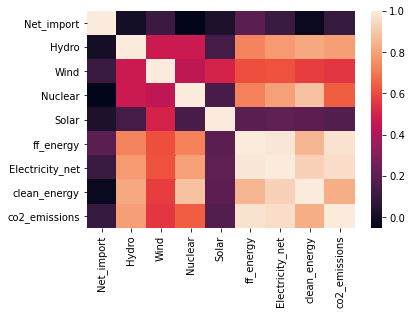

In [28]:
sns.heatmap(correlations)

It makes sense that the amount of electricity produced is 96% correlated with how many co2 emissions that the country has. However, we want to know how much the production of clean energy has an impact on co2 emissions.

In [29]:
# from sklearn.preprocessing import minmax_scale
# energy_and_co2.iloc[:,:7] = minmax_scale(energy_and_co2.iloc[:,:7],axis=1)
# energy_and_co2

In [30]:
# correlations = energy_and_co2.corr()
# correlations

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['Hydro', 'Wind', 'Nuclear', 'Solar', 'Electricity_net']
target = 'co2_emissions'

model = LinearRegression()
model.fit(energy_and_co2[features], energy_and_co2[target])
predictions = model.predict(energy_and_co2[features])
mse = mean_squared_error(energy_and_co2[target], predictions)
rmse = np.sqrt(mse)
rmse

116.03129257716242

In [32]:
energy_and_co2['co2_emissions'].describe()

count     4325.000000
mean       147.665105
std        663.559010
min          0.000000
25%          1.120000
50%          7.690000
75%         60.390000
max      10653.920000
Name: co2_emissions, dtype: float64

In [33]:
over_60 = energy_and_co2[energy_and_co2['co2_emissions']>60]
over_60['co2_emissions'].describe()

model2 = LinearRegression()
model2.fit(over_60[features], over_60[target])
predictions2 = model.predict(over_60[features])
mse = mean_squared_error(over_60[target], predictions2)
np.sqrt(mse)

228.96359698127037

## Conclusions:

I am very satisfied with the inital graphs as well as the cleaning and manipulation of dataframes. However, I am not satisfied with the simple premise of 'if a country makes more energy they make more CO2' because of the 96% correlation. I attempted to isolate green energy over time and see if that impacts the CO2 emissions but the dataset of only 1100 possible values with very scewed CO2 emissions data (<25% of the dataframe has the vast majority of the CO2 emissions) made this task impossible.